In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [4]:
print("Image Data Shape",digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


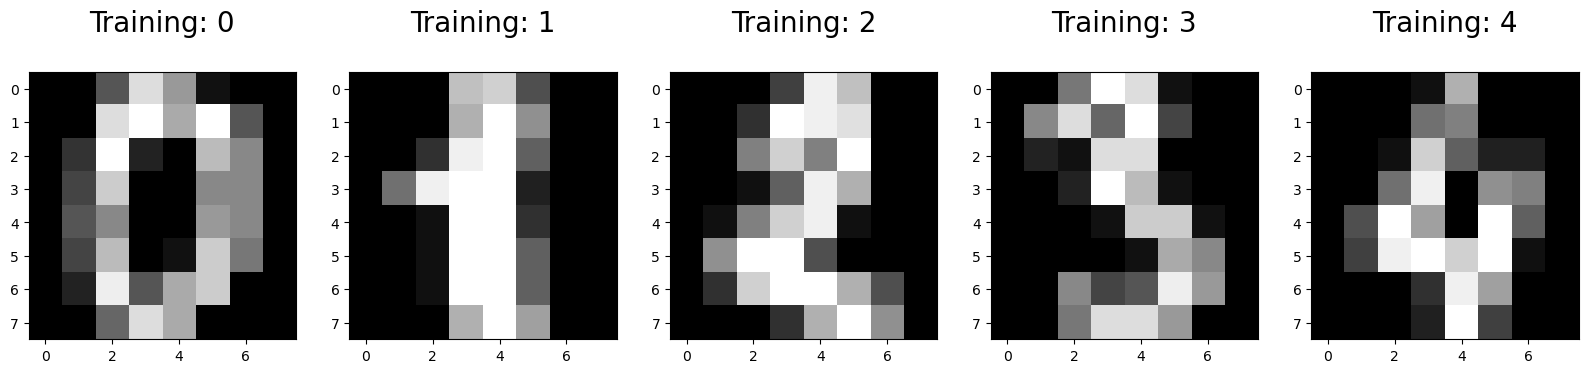

In [6]:
plt.figure (figsize= (20,4))
for index ,(image,label) in enumerate (zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [2]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size= 0.20, random_state=2)

NameError: name 'train_test_split' is not defined

In [ ]:
print(x_train.shape)

In [16]:
print(y_train.shape)

(1437,)


In [17]:
print(x_test.shape)

(360, 64)


In [18]:
print(y_test.shape)

(360,)


In [23]:
#Train Model
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=2000, solver='saga')
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=2000, solver='saga')

In [24]:
#Predict Regression
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [30]:
predictions = logisticRegr.predict(x_test)

In [31]:
#Find accuracy score
score = logisticRegr.score(x_test, y_test)
print(score)

0.9472222222222222


In [32]:
#Print Confusion Matrix
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[31  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  1  0]
 [ 0  0  0  0 31  0  0  0  3  1]
 [ 0  1  0  0  1 41  0  0  0  0]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  1 25]]


Text(0.5, 1.0, 'Acurracy Score:0.9472222222222222')

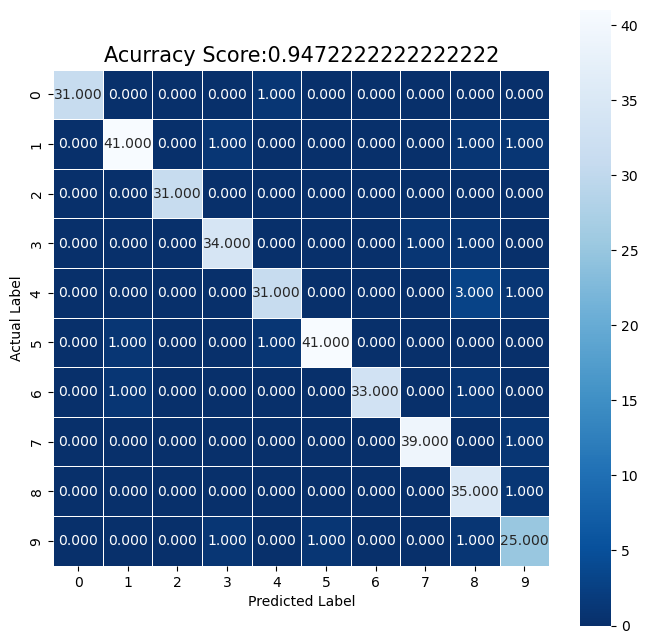

In [41]:
#Heat Map of confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel ('Actual Label')
plt.xlabel ('Predicted Label')
all_sample_title = 'Acurracy Score:{0}'.format(score)
plt.title(all_sample_title, size=15)

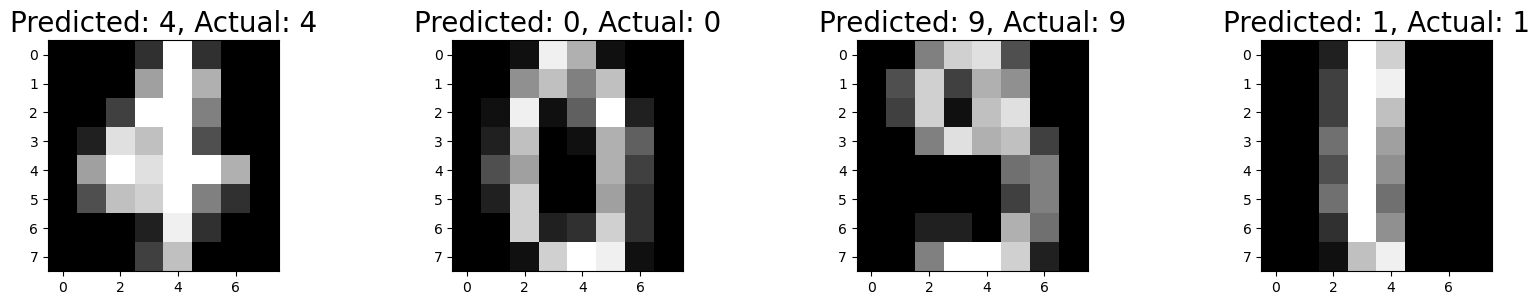

In [42]:
index = 0
classifiedIndex = []
for predict, actual in zip (prediction, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate (classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(prediction[wrong], y_test[wrong]), fontsize = 20)